# **Model Setup**

### Loading packages and defining parameters:

In [1]:
import pickle
import os
from sympy import Identity, symarray

from PyTransport import PyTransSetup

In [2]:
nF, nP = 2, 3  # Number of fields and parameters
f, p = symarray('f', nF), symarray('p', nP)

### Potential and field-space metric:

In [3]:
V = p[0]/2 * p[2]**2 * (f[0]**2 + p[1]*f[1]**2) # Here, p is [alpha, R, mphi] and f is [phi, chi]
G = 6 * p[0] / (1-f[0]**2-f[1]**2)**2 * Identity(2)

### PyTransport setup:

In [4]:
PyTransSetup.potential(V, nF, nP, False, G) # Converts potential defined above to C++ code
PyTransSetup.compileName3("Angular", True)  # Compiles a package called PyTransAngular with many useful functions

running install
running build
running build_ext
building 'PyTransAngular' extension
creating build
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/home
creating build/temp.linux-x86_64-3.8/home/gsalinas
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/CppTrans
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/CppTrans/stepper
gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -DOPENSSL_NO_SSL3 -fPIC -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include -I/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/ -I/home/gsalinas/.pyenv/versions/3.8.10/envs

In file included from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940,
                 from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /home/gsalinas/GitHub/angular/PyTransport/PyTrans/PyTrans.cpp:20:
/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /home/gsalinas/GitHub/angular/PyTransport/CppTrans/NC/moments.h:20,
                 from /home/gsalinas/GitHub

gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -DOPENSSL_NO_SSL3 -fPIC -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include -I/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/ -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/include -I/home/gsalinas/.pyenv/versions/3.8.10/include/python3.8 -c /home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp -o build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.o


/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp: In function ‘void timestamp()’:
/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp:1116:12: warning: variable ‘len’ set but not used [-Wunused-but-set-variable]
 1116 |     size_t len;
      |            ^~~


creating build/lib.linux-x86_64-3.8
g++ -shared -L/home/gsalinas/.pyenv/versions/3.8.10/lib -Wl,-rpath=/home/gsalinas/.pyenv/versions/3.8.10/lib -L/home/gsalinas/.pyenv/versions/3.8.10/lib -Wl,-rpath=/home/gsalinas/.pyenv/versions/3.8.10/lib build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/PyTrans.o build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.o -L/home/gsalinas/.pyenv/versions/3.8.10/lib -o build/lib.linux-x86_64-3.8/PyTransAngular.cpython-38-x86_64-linux-gnu.so
running install_lib
copying build/lib.linux-x86_64-3.8/PyTransAngular.cpython-38-x86_64-linux-gnu.so -> /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python
running install_egg_info
Removing /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python/PyTransAngular-1.0-py3.8.egg-info
Writing /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python/PyTransAngular-1.0-py3.8.egg-info


# **Background Evolution**

### Loading more packages:

In [5]:
import json
import sys
from math import cos, pi, sin
from typing import Callable

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 200
location = "/home/gsalinas/GitHub/angular/PyTransport"
sys.path.append(location)

import PyTransSetup

PyTransSetup.pathSet()

import PyTransAngular as PyT

### Functions to calculate background evolution:

In [6]:
def get_background(initial: np.ndarray, params: dict, Nrange: tuple, tol: float = 1e-30) -> np.ndarray:
    """Calculates background evolution of fields.
    Inputs:
    - initial:      Initial field values and field velocities
    - params:       Parameter values
    - Nrange:       Number of e-folds range and step in the form (Nini, Nend, Nstep)
    - tol:          Tolerances (abs and rel) for integrator

    Returns:
    - back:         2d-array with field values and velocities for each number of e-folds
    """
    Ns = np.linspace(Nrange[0], Nrange[1], Nrange[2], endpoint=True)
    pval = np.array(list(params.values()))
    tols = np.array([tol, tol])
    back = PyT.backEvolve(Ns, initial, pval, tols, True)
    return back

def get_background_func(back: np.ndarray) -> tuple:
    """Calculates background evolution of fields.
    Inputs:
    - back:         2d-array with field values and velocities for each number of e-folds

    Returns:
    - phi:          Function that returns phi given number of e-folds
    - chi:          Function that returns chi given number of e-folds
    - phidot:       Function that returns phidot given number of e-folds
    - chidot:       Function that returns chidot given number of e-folds
    """
    Ns, phis, chis, phidots, chidots = back[:, 0], back[:, 1], back[:, 2], back[:, 3], back[:, 4]
    phi, chi, phidot, chidot = lambda N: np.interp(N, Ns, phis), lambda N: np.interp(N, Ns, chis), \
        lambda N: np.interp(N, Ns, phidots), lambda N: np.interp(N, Ns, chidots)

    return phi, chi, phidot, chidot

### Parameter values:

In [7]:
params = {'alpha': 1/600, 'R': 9, 'mphi': 2.e-5}

### Initial conditions:

In [8]:
r0, theta0 = 0.99, pi/4
phi0, chi0 = r0 * np.array([cos(theta0), sin(theta0)])  # Initial field values

phidot0, chidot0 = np.zeros(2)  # Initial field velocities

### Calculate background evolution:

In [9]:
initial = np.array([phi0, chi0, phidot0, chidot0])
Nrange = (0, 100, 100_000)

back = get_background(initial, params, Nrange)
phix, phiy, phidotx, phidoty = get_background_func(back)

91624


In [10]:
Nini, Nend = back[0, 0], back[-1, 0]
print(f'Number of e-folds: {Nend:.3}')

Nexit = Nend - 55
print(f'Horizon exit: {Nexit:.3}')

Number of e-folds: 91.6
Horizon exit: 36.6


### Plot background evolution:

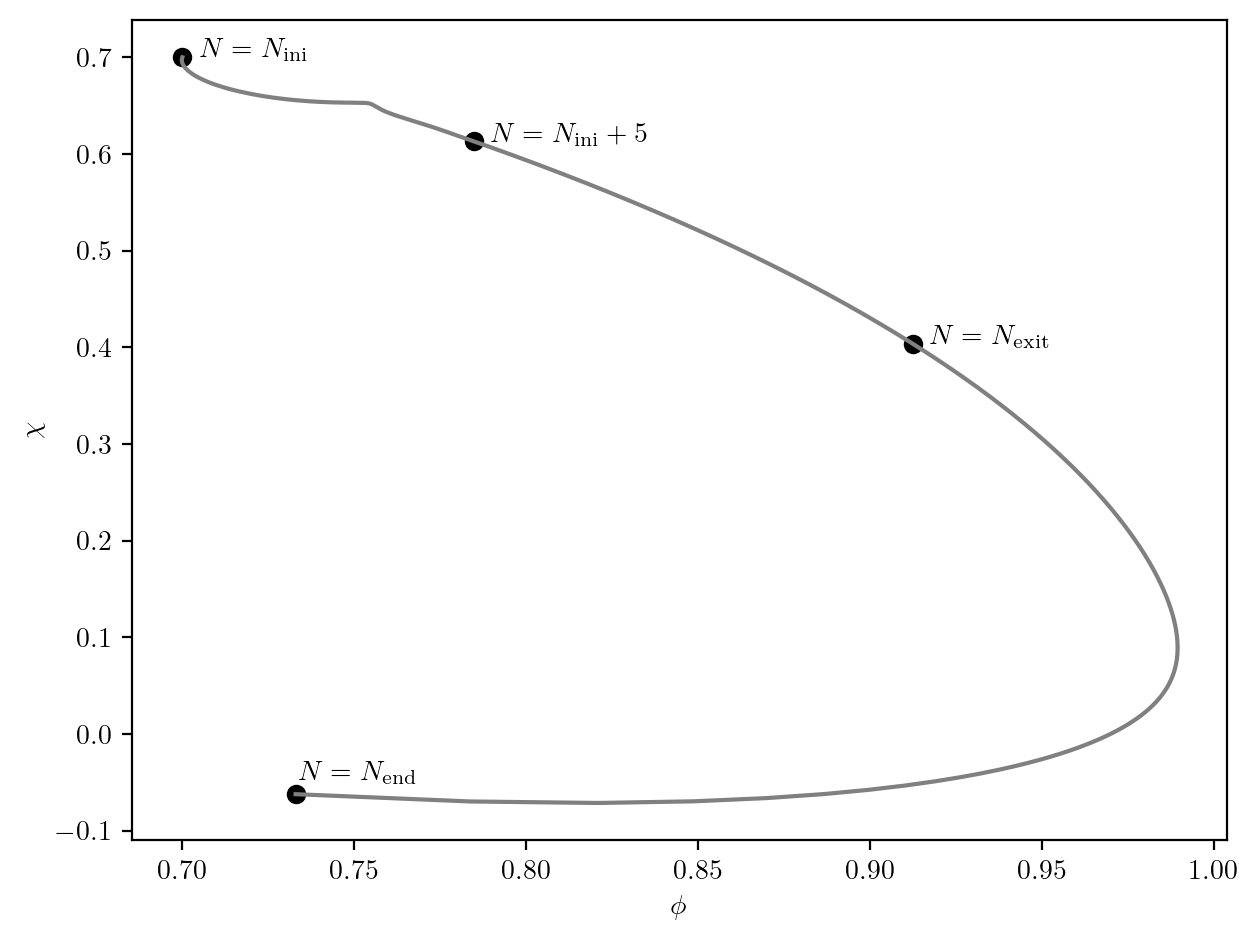

In [11]:
num_points = 10_000 # Number of poitns to use in the plot
Nplot = np.linspace(Nini, Nend, num_points)

plt.plot(phix(Nplot), phiy(Nplot), c='gray')
plt.scatter([phix(Nini), phix(Nini+5.), phix(Nexit), phix(Nend)],
            [phiy(Nini), phiy(Nini+5.), phiy(Nexit), phiy(Nend)],
            c="k")
plt.annotate("$N = N_{\\rm ini}$", (phix(Nini)+0.005, phiy(Nini)))
plt.annotate("$N = N_{\\rm ini}+5$", (phix(Nini+5.)+0.005, phiy(Nini+5.)))
plt.annotate("$N = N_{\\rm exit}$", (phix(Nexit)+0.005, phiy(Nexit)))
plt.annotate("$N = N_{\\rm end}$", (phix(Nend)+0.001, phiy(Nend)+0.015))
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi$')
plt.tight_layout()